In [1]:
"""
Plot an arbitrary Light Curve from Stripe 82 data to see the range of errors
Information on data columns found at:
http://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern_format_LC.html
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def plot_light_curve(file_path):
    """
    Plot a given light curve with error bars
    """

    # Opening a light curve file
    with open(file_path, 'r') as f:
        next(f)
        df = pd.DataFrame(l.rstrip().split() for l in f)

    # Converting string to numeric
    for i in range(15):
        df[i] = pd.to_numeric(df[i])

    # Cleaning unphysical magnitudes
    df_u = df[df[1] > 1]
    df_g = df[df[4] > 1]
    df_r = df[df[7] > 1]
    df_i = df[df[10] > 1]
    df_z = df[df[13] > 1]

    # Plotting
    fig = plt.figure(figsize=(8, 5))
    sns.set(font='Times New Roman')
    sns.set_context('paper')
    u = plt.plot(df_u[0], df_u[1], label='u', color='purple', marker='*', ls='')
    g = plt.plot(df_g[3], df_g[4], label='g', color='green', marker='*', ls='')
    r = plt.plot(df_r[6], df_r[7], label='r', color='red', marker='*', ls='')
    i = plt.plot(df_i[9], df_i[10], label='i', color='yellow', marker='*', ls='')
    z = plt.plot(df_z[12], df_z[13], label='z', color='blue', marker='*', ls='')
    plt.errorbar(df_u[0], df_u[1], yerr=df_u[2], ecolor='purple', ls='',
                 elinewidth=1.2, alpha=0.6)
    plt.errorbar(df_g[3], df_g[4], yerr=df_g[5], ecolor='green', ls='',
                 elinewidth=1.2, alpha=0.6)
    plt.errorbar(df_r[6], df_r[7], yerr=df_r[8], ecolor='red', ls='',
                 elinewidth=1.2, alpha=0.6)
    plt.errorbar(df_i[9], df_i[10], yerr=df_i[11], ecolor='yellow', ls='',
                 elinewidth=1.2, alpha=0.6)
    plt.errorbar(df_z[12], df_z[13], yerr=df_z[14], ecolor='blue', ls='',
                 elinewidth=1.2, alpha=0.6)
    plt.xlabel('Modified Julian Day [MJD]', fontsize=12)
    plt.ylabel('Magnitude',  fontsize=12)
    plt.title('Light Curve', fontsize=15)
    plt.gca().invert_yaxis()
    plt.legend((u, g, r, i, z), labels=('u', 'g', 'r', 'i', 'z'))
    plt.show()

/Users/devanshipratap/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


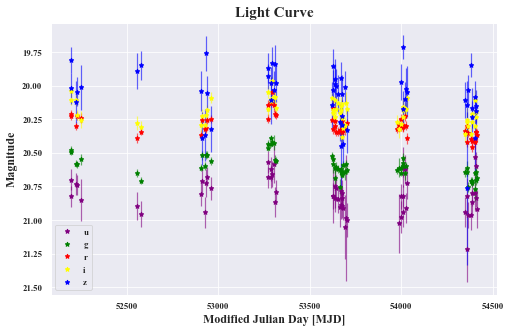

In [3]:
# Plot a physical light curve
plot_light_curve('../scripts/light_curves/stripe82/70')

/Users/devanshipratap/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


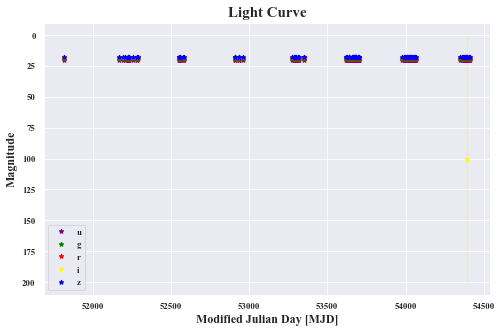

In [4]:
# Plot an unphysical light curve
plot_light_curve('../scripts/light_curves/stripe82/1000743')